In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tqdm.auto import tqdm

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

import pickle

In [3]:
from utils.learn import train_classifier

Using TensorFlow backend.


In [4]:
data = pd.read_csv('dataset/data_cleaned.csv')

In [5]:
vectorizer = TfidfVectorizer(sublinear_tf=True)
X = vectorizer.fit_transform(data['text'])
y = data['clickbait'].values

print('X shape', X.shape, '\ny shape', y.shape)

X shape (125922, 42917) 
y shape (125922,)


In [6]:
pickle.dump(vectorizer, open('vectorizer.pkl', 'wb'))

# Logistic Regression


Accuracy: 0.8745 (0.0025)
AUROC: 0.9431 (0.0023)


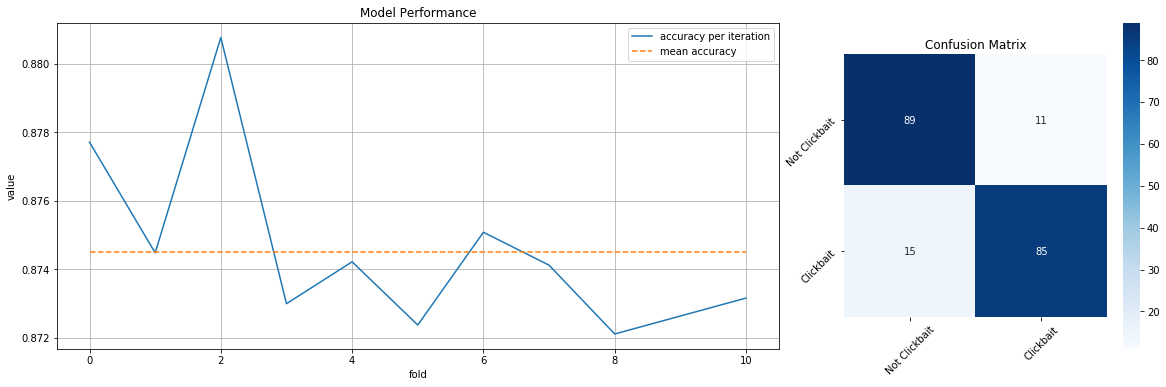

In [7]:
model = LogisticRegression(class_weight='balanced', max_iter=1000, C=3.33, random_state=19)
model_performance, cm, model = train_classifier(
    model, X, y, labels=['Not Clickbait', 'Clickbait']
)
print(f'Accuracy: {np.mean(model_performance["accuracy"]):.4f} ({np.std(model_performance["accuracy"]):.4f})')
print(f'AUROC: {np.mean(model_performance["score"]):.4f} ({np.std(model_performance["score"]):.4f})')

In [8]:
pickle.dump(model, open('lr.pkl', 'wb'))

# Naive Bayes


Accuracy: 0.8565 (0.0022)
AUROC: 0.9341 (0.0023)


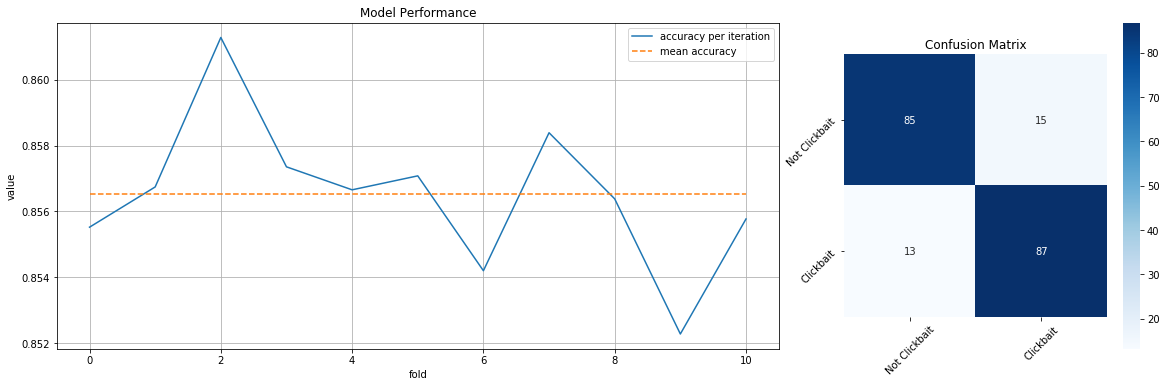

In [9]:
model = MultinomialNB()
model_performance, cm, model = train_classifier(
    model, X, y, labels=['Not Clickbait', 'Clickbait'], smote=True
)
print(f'Accuracy: {np.mean(model_performance["accuracy"]):.4f} ({np.std(model_performance["accuracy"]):.4f})')
print(f'AUROC: {np.mean(model_performance["score"]):.4f} ({np.std(model_performance["score"]):.4f})')

In [10]:
pickle.dump(model, open('nb.pkl', 'wb'))